In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import confusion_matrix,classification_report

In [2]:
def Model_NGram(model_name,n_gram):

  ngram = (n_gram,n_gram)
  cnt = CountVectorizer(analyzer = 'char',ngram_range=ngram)

  pipeline = Pipeline([
   ('vectorizer',cnt),  
   ('model',model_name())
])  
  return pipeline

In [3]:
import csv
classes = []
classes_names = []
with open('../input/languages-dataset/labels.csv') as csv_file:
    csv_reader = csv.reader(csv_file, delimiter=';')
    line_count = 0
    for row in csv_reader:
        if line_count == 0:
            line_count += 1
        else:
            classes.append(row[0])
            classes_names.append(row[1])
            line_count += 1
    print(f'Processed {line_count} lines.')


Processed 236 lines.


In [4]:
classes = classes[:100]
classes_names = classes_names[:100]
print(len(classes), len(classes_names))

100 100


In [5]:
def read_data(classes=None,path=''):
    av = True
    path = path
    if not classes:
        classes = set()
        av = False
    else: 
        classes = classes 
    x_train = []
    y_train = []
    x_test = []
    y_test = []
    
    with open(path + 'x_train.txt','r',encoding="utf8") as xf, open(path + 'y_train.txt','r',encoding="utf8") as yf:
        for x,y in zip(xf, yf):
            if av:
                if y.strip() in classes:
                    x_train.append(x.strip())
                    y_train.append(y.strip())
                else:
                    pass
            else:
                x_train.append(x.strip())
                y_train.append(y.strip())
                classes.add(y.strip())

                

    with open(path + 'x_test.txt','r',encoding="utf8") as xf, open(path + 'y_test.txt','r',encoding="utf8") as yf:
        for x,y in zip(xf, yf):
            if av:
                if y.strip() in classes:
                    x_test.append(x.strip())
                    y_test.append(y.strip())
                else:
                    pass
            else:
                x_test.append(x.strip())
                y_test.append(y.strip())
                classes.add(y.strip())
    return x_train,y_train,x_test,y_test

In [6]:
x_train,y_train,x_test,y_test = read_data(classes,path = '../input/languages-dataset/')

In [7]:
len(x_train)

50000

Accuracy =  0.94844


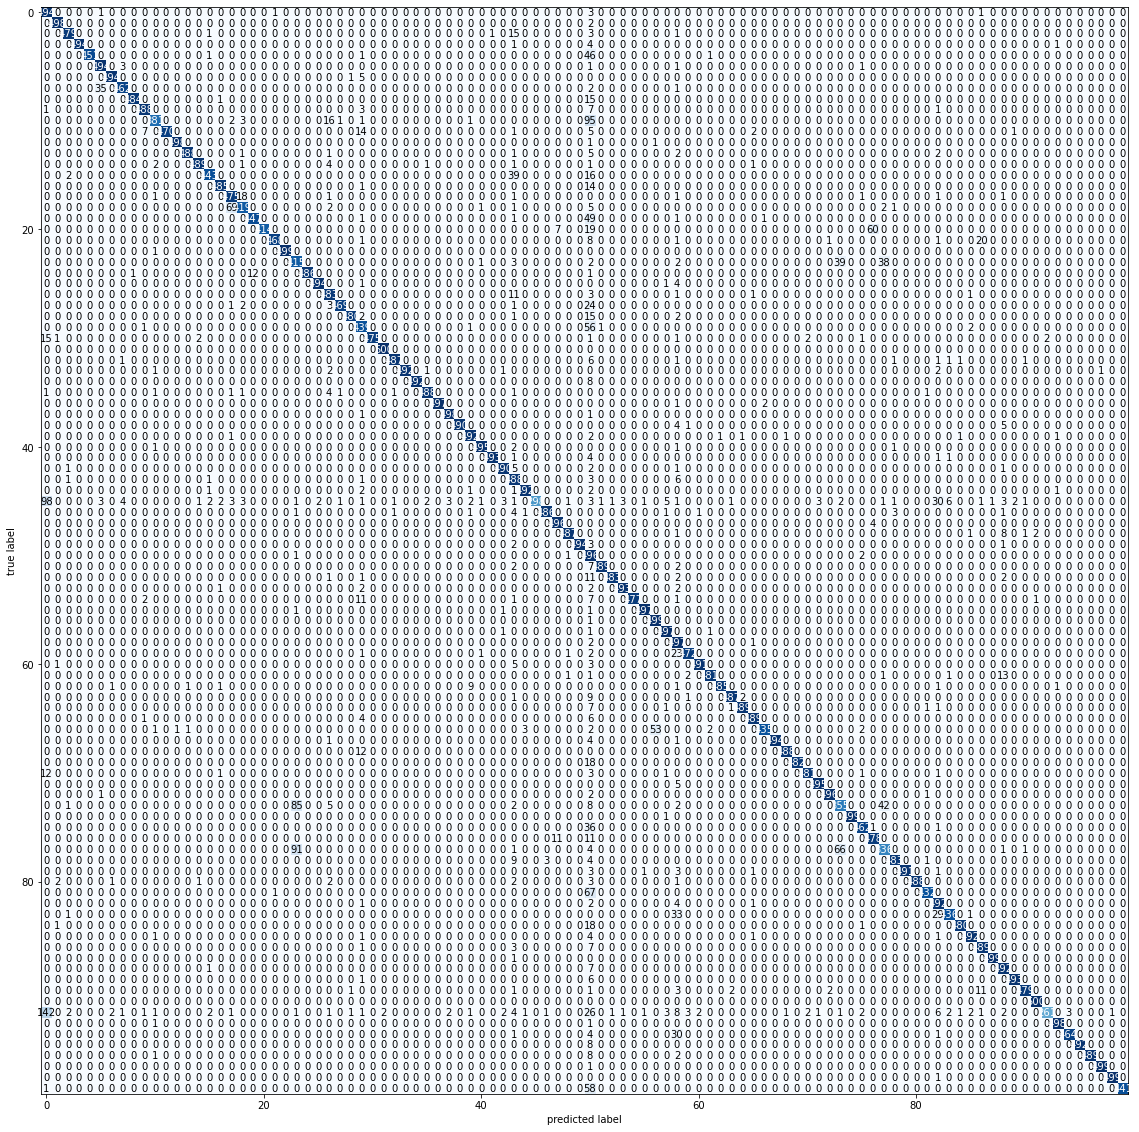

In [8]:
cnt = CountVectorizer()
pipeline = Pipeline([
   ('vectorizer',cnt),  
   ('model',MultinomialNB())
])  

Multinomial_Language_Detection = pipeline.fit(x_train,y_train)
#Naive Bayes Predict
from sklearn.metrics import *
ypred_NaiveBayes = Multinomial_Language_Detection.predict(x_test)
print("Accuracy = ",accuracy_score(y_test,ypred_NaiveBayes)) #accuracy score
#Confusion Matrix
from mlxtend.evaluate import confusion_matrix
from mlxtend.plotting import plot_confusion_matrix
from matplotlib.pyplot import subplots

cm = confusion_matrix(y_target=y_test, 
                  y_predicted=ypred_NaiveBayes)

fig, ax = plot_confusion_matrix(conf_mat=cm, figsize=(20,20))

plt.savefig('CM100_NaiveBayes_characters.png')

Accuracy =  0.88066


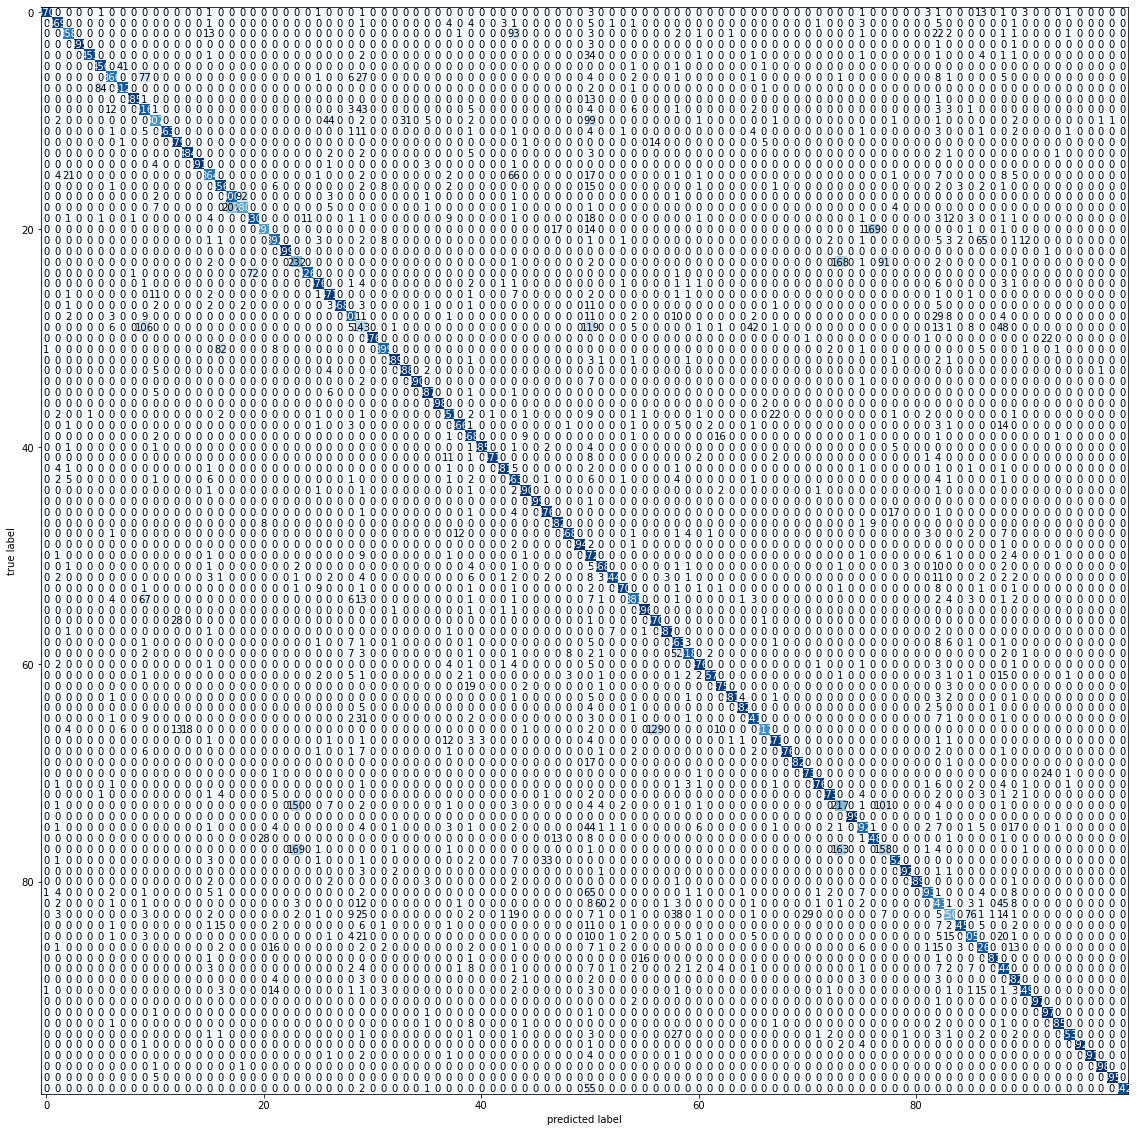

In [9]:
Multinomial_Language_Detection1 = Model_NGram(MultinomialNB,1).fit(x_train,y_train) #Unigram Model
#Naive Bayes N1 Predict
from sklearn.metrics import *
ypred_NaiveBayesN1 = Multinomial_Language_Detection1.predict(x_test)
print("Accuracy = ",accuracy_score(y_test,ypred_NaiveBayesN1)) #accuracy score

#Confusion Matrix
from mlxtend.evaluate import confusion_matrix
from mlxtend.plotting import plot_confusion_matrix
from matplotlib.pyplot import subplots

cm = confusion_matrix(y_target=y_test, 
                  y_predicted=ypred_NaiveBayesN1)

fig, ax = plot_confusion_matrix(conf_mat=cm, figsize=(20,20))

plt.savefig('CM100_NaiveBayes_1.png')

Accuracy =  0.92372


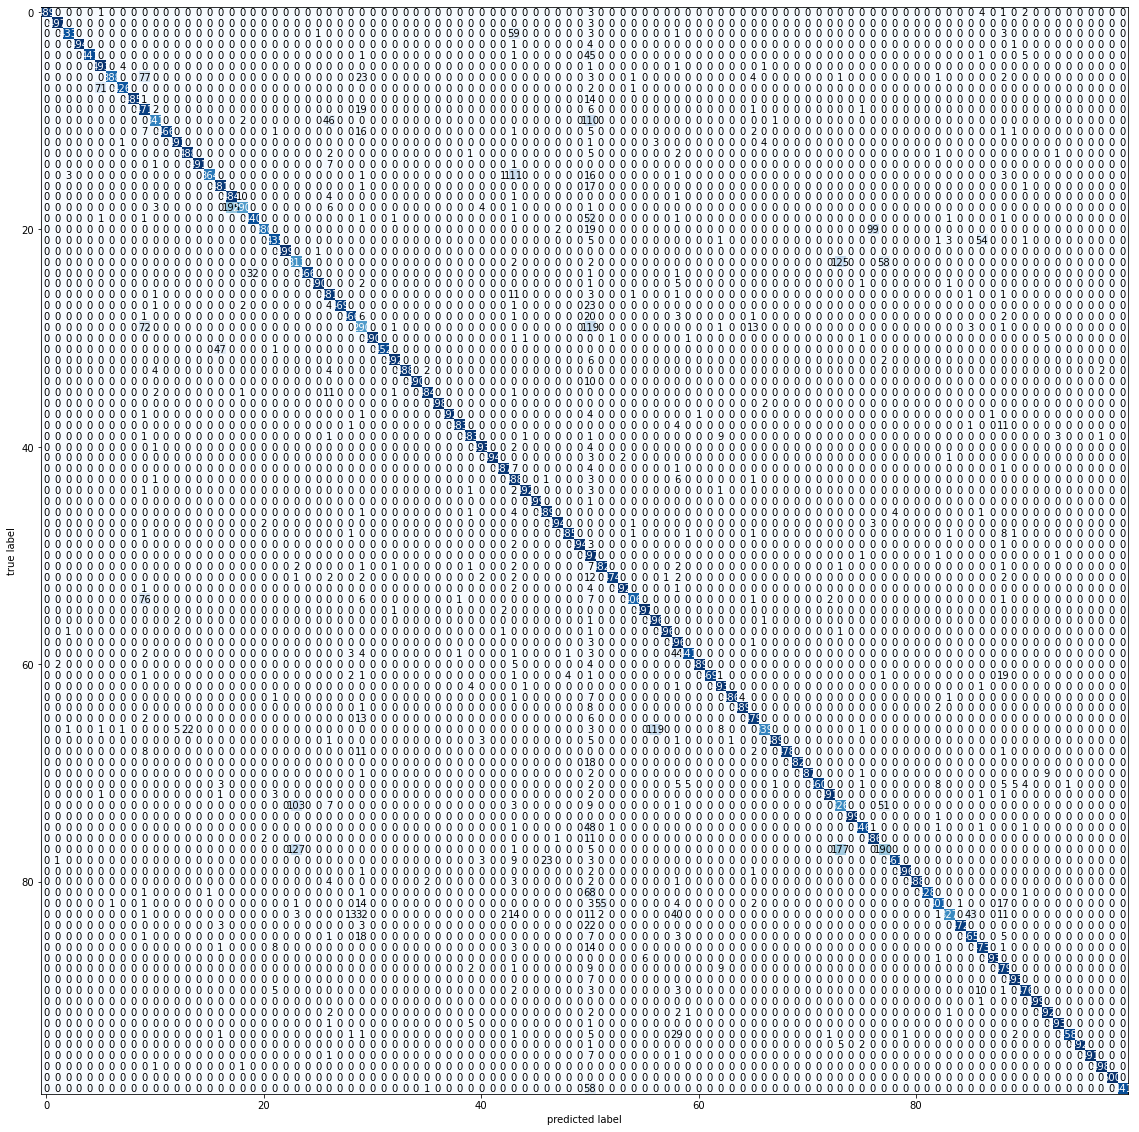

In [10]:
Multinomial_Language_Detection2 = Model_NGram(MultinomialNB,2).fit(x_train,y_train) #Unigram Model
#Naive Bayes N2 Predict
from sklearn.metrics import *
ypred_NaiveBayesN2 = Multinomial_Language_Detection2.predict(x_test)
print("Accuracy = ",accuracy_score(y_test,ypred_NaiveBayesN2)) #accuracy score

#Confusion Matrix
from mlxtend.evaluate import confusion_matrix
from mlxtend.plotting import plot_confusion_matrix
from matplotlib.pyplot import subplots

cm = confusion_matrix(y_target=y_test, 
                  y_predicted=ypred_NaiveBayesN2)

fig, ax = plot_confusion_matrix(conf_mat=cm, figsize=(20,20))

plt.savefig('CM100_NaiveBayes_2.png')

Accuracy =  0.94672


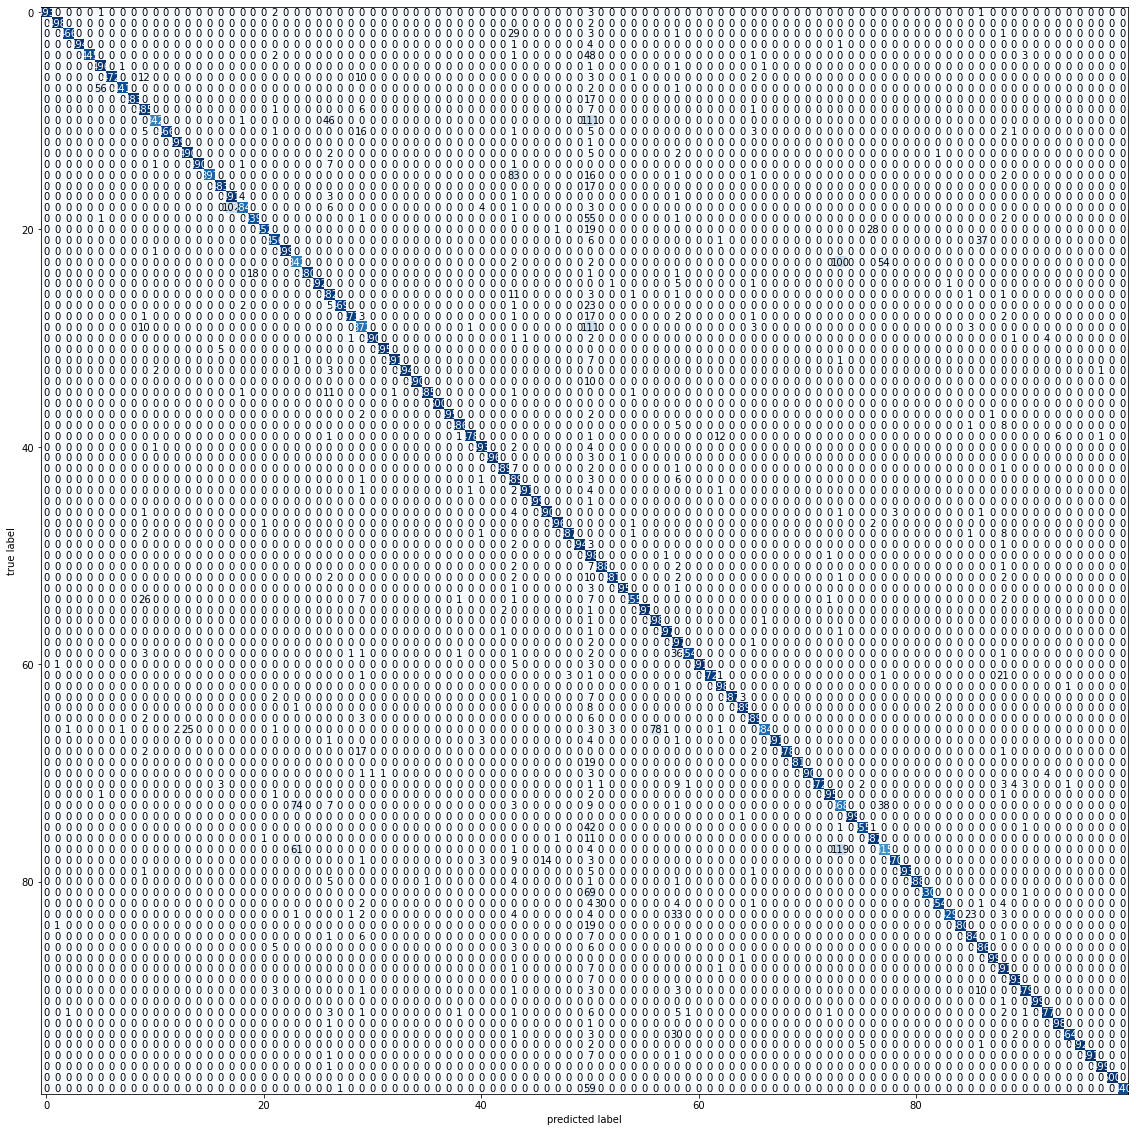

In [11]:
Multinomial_Language_Detection3 = Model_NGram(MultinomialNB,3).fit(x_train,y_train) #Unigram Model
#Naive Bayes N3 Predict
from sklearn.metrics import *
ypred_NaiveBayesN3 = Multinomial_Language_Detection3.predict(x_test)
print("Accuracy = ",accuracy_score(y_test,ypred_NaiveBayesN3)) #accuracy score

#Confusion Matrix
from mlxtend.evaluate import confusion_matrix
from mlxtend.plotting import plot_confusion_matrix
from matplotlib.pyplot import subplots

cm = confusion_matrix(y_target=y_test, 
                  y_predicted=ypred_NaiveBayesN3)

fig, ax = plot_confusion_matrix(conf_mat=cm, figsize=(20,20))

plt.savefig('CM100_NaiveBayes_3.png')

Accuracy =  0.95526


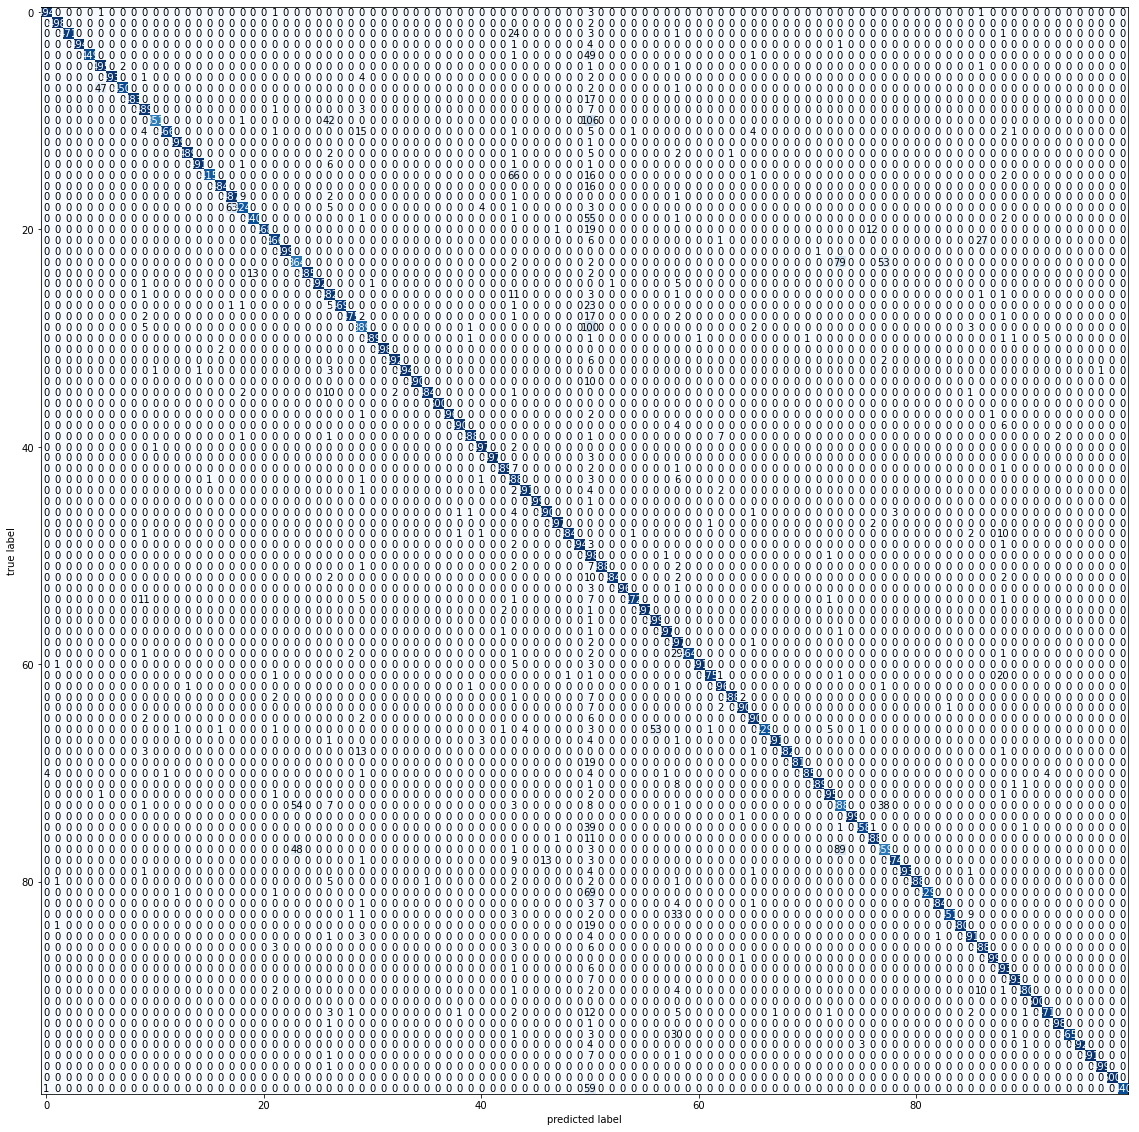

In [12]:
Multinomial_Language_Detection4 = Model_NGram(MultinomialNB,4).fit(x_train,y_train) #Unigram Model
#Naive Bayes N4 Predict
from sklearn.metrics import *
ypred_NaiveBayesN4 = Multinomial_Language_Detection4.predict(x_test)
print("Accuracy = ",accuracy_score(y_test,ypred_NaiveBayesN4)) #accuracy score

#Confusion Matrix
from mlxtend.evaluate import confusion_matrix
from mlxtend.plotting import plot_confusion_matrix
from matplotlib.pyplot import subplots

cm = confusion_matrix(y_target=y_test, 
                  y_predicted=ypred_NaiveBayesN4)

fig, ax = plot_confusion_matrix(conf_mat=cm, figsize=(20,20))

plt.savefig('CM100_NaiveBayes_4.png')

Accuracy =  0.958


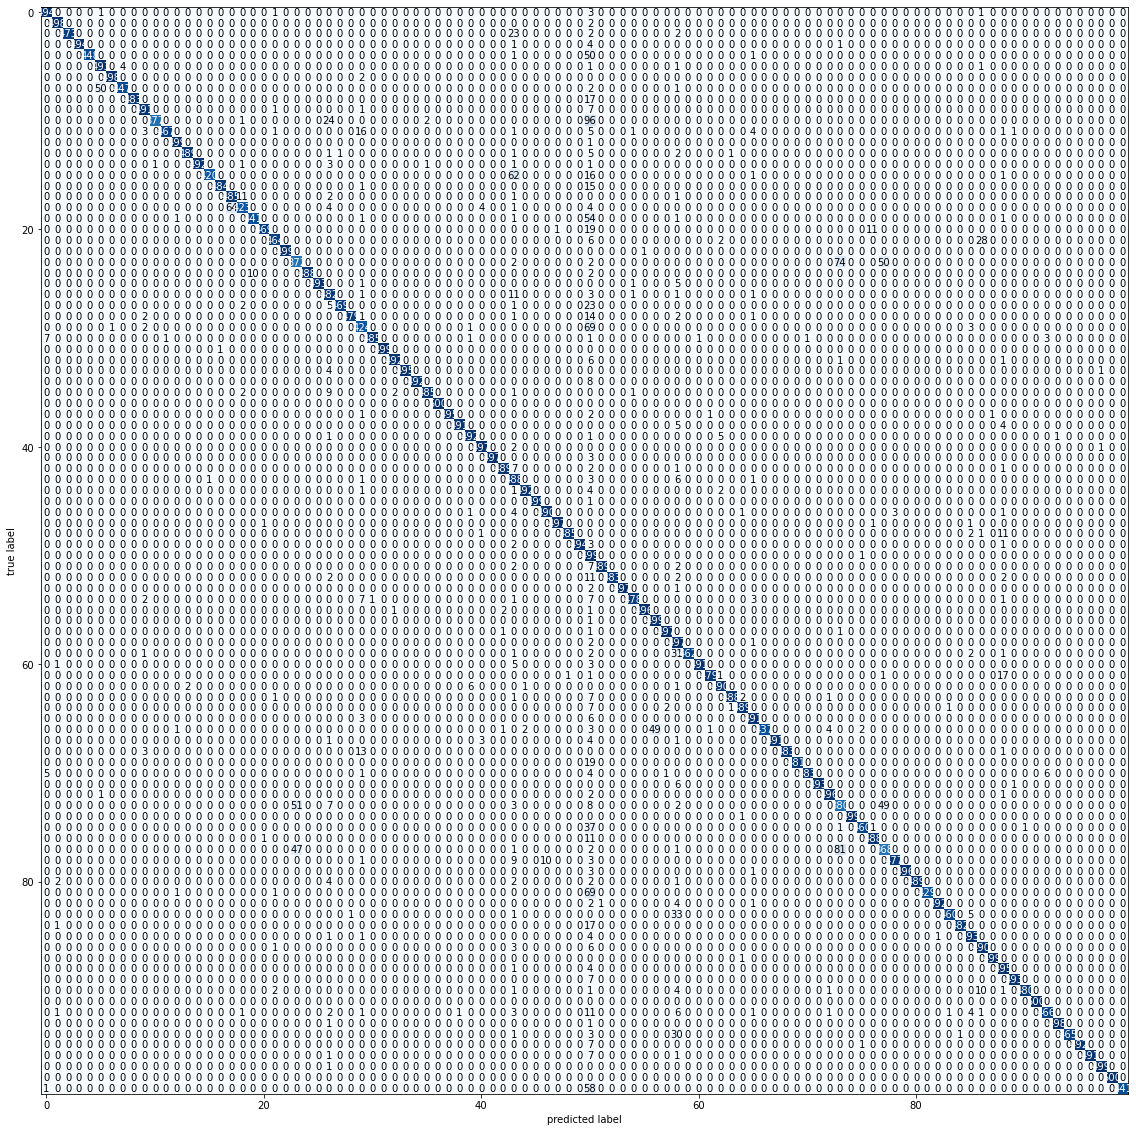

In [8]:
Multinomial_Language_Detection5 = Model_NGram(MultinomialNB,5).fit(x_train,y_train) #Unigram Model
#Naive Bayes N5 Predict
from sklearn.metrics import *
ypred_NaiveBayesN5 = Multinomial_Language_Detection5.predict(x_test)
print("Accuracy = ",accuracy_score(y_test,ypred_NaiveBayesN5)) #accuracy score

#Confusion Matrix
from mlxtend.evaluate import confusion_matrix
from mlxtend.plotting import plot_confusion_matrix
from matplotlib.pyplot import subplots

cm = confusion_matrix(y_target=y_test, 
                  y_predicted=ypred_NaiveBayesN5)

fig, ax = plot_confusion_matrix(conf_mat=cm, figsize=(20,20))

plt.savefig('CM100_NaiveBayes_5.png')

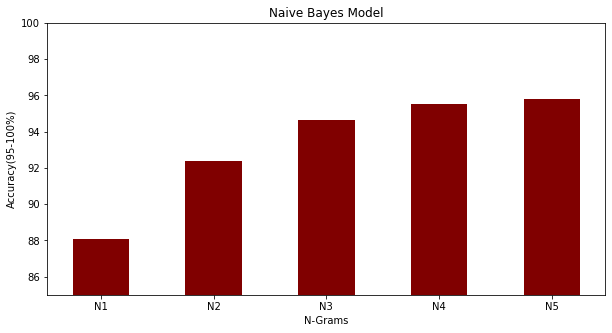

In [3]:
import numpy as np 
import matplotlib.pyplot as plt  
  
   
data = {'N1':0.88066*100, 
        'N2':0.92372*100,
        'N3':0.94672*100,  
        'N4':0.95526*100,
        'N5':0.958*100} 
courses = list(data.keys()) 
values = list(data.values()) 
   
fig = plt.figure(figsize = (10, 5)) 
  
# creating the bar plot 
plt.bar(courses, values, color ='maroon',  
        width = 0.5) 
  
plt.xlabel("N-Grams") 
plt.ylabel("Accuracy(95-100%)") 
plt.title("Naive Bayes Model") 
plt.ylim([85,100])
plt.show()

/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Accuracy =  0.8928


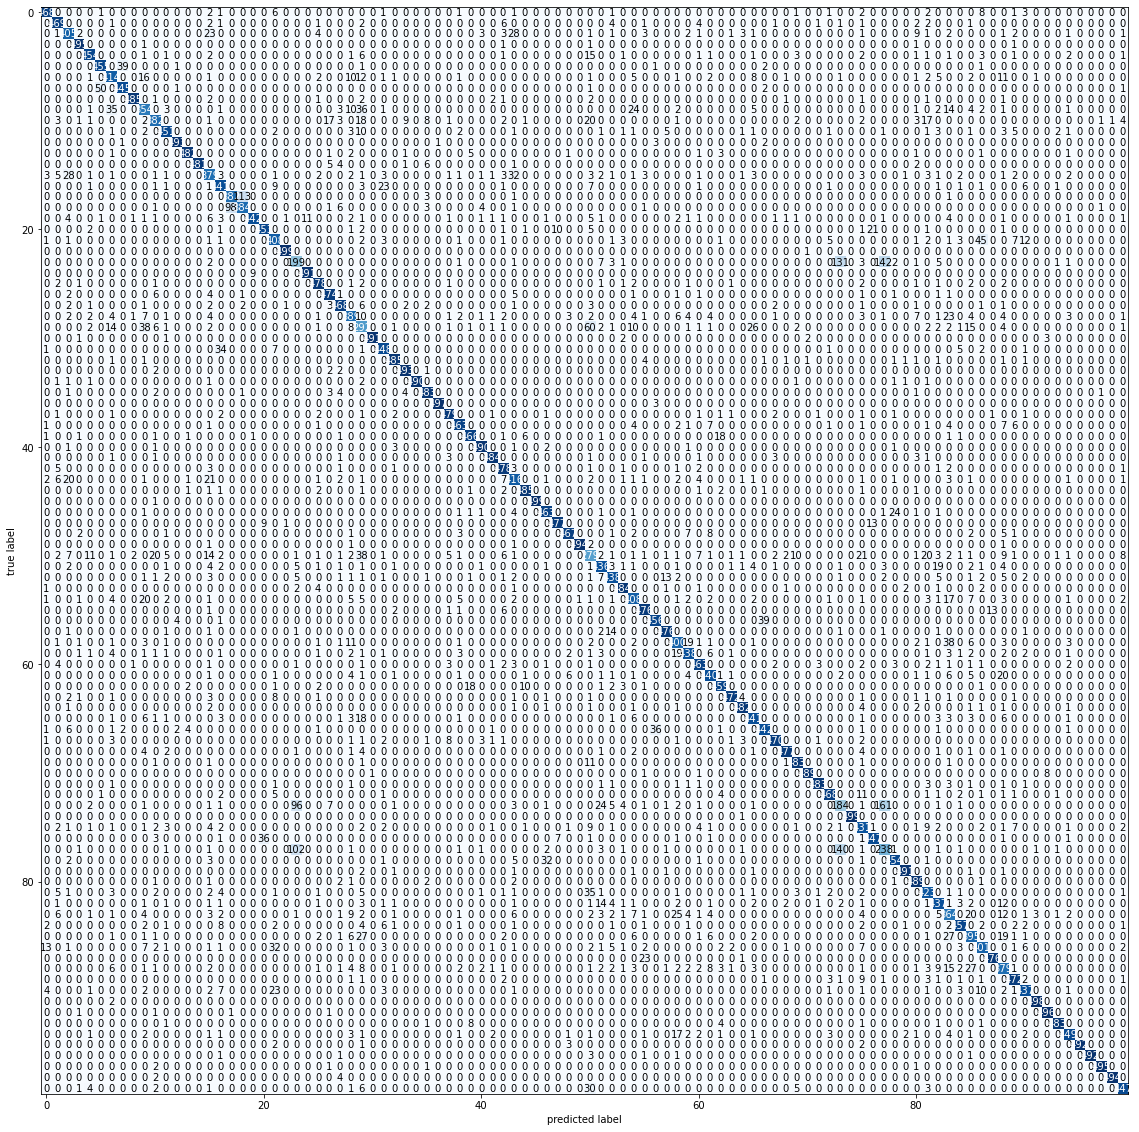

In [9]:

from sklearn.linear_model import LogisticRegression
LR_Language_Detection1 = Model_NGram(LogisticRegression,1).fit(x_train,y_train) #Unigram Model
#Logistic Regression N1 Predict
from sklearn.metrics import *
ypred_LRN1 = LR_Language_Detection1.predict(x_test)
print("Accuracy = ",accuracy_score(y_test,ypred_LRN1)) #accuracy score

#Confusion Matrix
from mlxtend.evaluate import confusion_matrix
from mlxtend.plotting import plot_confusion_matrix
from matplotlib.pyplot import subplots

cm = confusion_matrix(y_target=y_test, 
                  y_predicted=ypred_LRN1)

fig, ax = plot_confusion_matrix(conf_mat=cm, figsize=(20,20))

plt.savefig('CM100_LR_Language_DetectionCMsmall1.png')

/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Accuracy =  0.95052


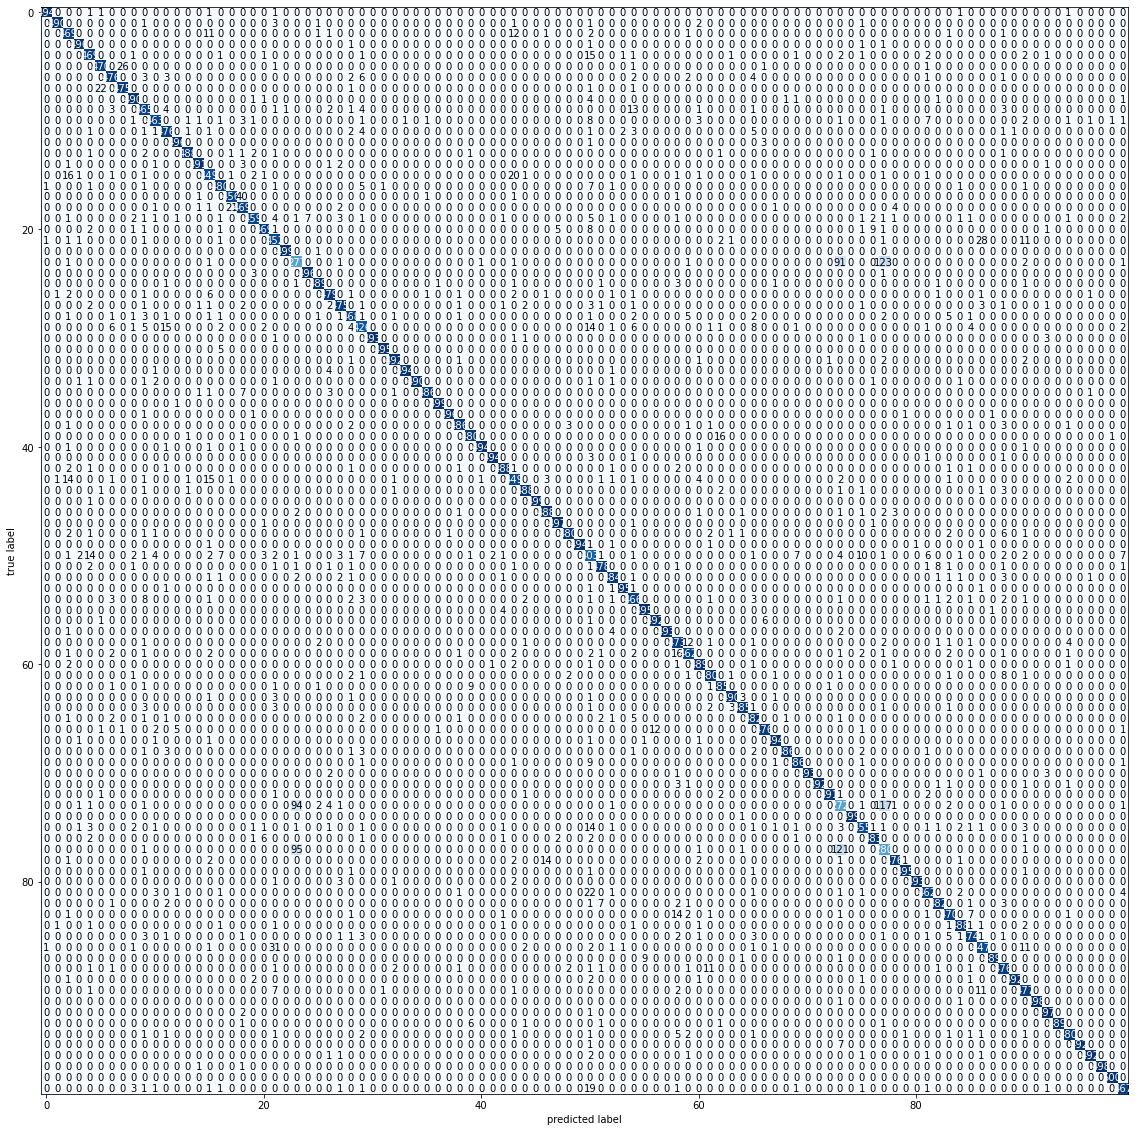

In [10]:
from sklearn.linear_model import LogisticRegression
LR_Language_Detection2 = Model_NGram(LogisticRegression,2).fit(x_train,y_train) #Unigram Model
#Logistic Regression N2 Predict
from sklearn.metrics import *
ypred_LRN2 = LR_Language_Detection2.predict(x_test)
print("Accuracy = ",accuracy_score(y_test,ypred_LRN2)) #accuracy score

#Confusion Matrix
from mlxtend.evaluate import confusion_matrix
from mlxtend.plotting import plot_confusion_matrix
from matplotlib.pyplot import subplots

cm = confusion_matrix(y_target=y_test, 
                  y_predicted=ypred_LRN2)

fig, ax = plot_confusion_matrix(conf_mat=cm, figsize=(20,20))

plt.savefig('CM100_LR_Language_DetectionCMsmall2.png')

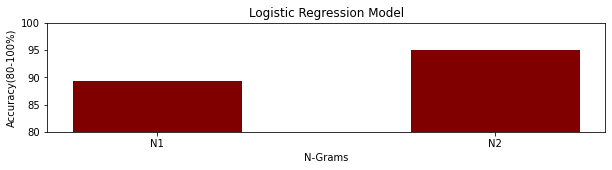

In [10]:
data = {'N1':0.8928*100, 
        'N2':0.95052*100,} 
courses = list(data.keys()) 
values = list(data.values()) 
   
fig = plt.figure(figsize = (5, 5)) 
  
# creating the bar plot 
plt.bar(courses, values, color ='maroon',  
        width = 0.5) 
  
plt.xlabel("N-Grams") 
plt.ylabel("Accuracy(80-100%)") 
plt.title("Logistic Regression Model") 
plt.ylim([80,100])
plt.show()